In [142]:
import numpy as np

Gradient Descent

1.

In [143]:
def gradientx(x,y):
    f = 4*x**3+4*x*y-42*x+2*y**2-14
    return f

In [144]:
def gradienty(x,y):
    f = 4*y**3-26*y+4*x*y+2*x**2-22
    return f

In [145]:
def nextstep(x,y,a,s):
    n = [a[0] - s*gradientx(x,y),a[1]-s*gradienty(x,y)]
    return n

In [146]:
x = [0,-4]
y = 0.005
for i in range(10000):
    x = nextstep(x[0],x[1],x,y)
    z = np.linalg.norm([gradientx(x[0],x[1]),gradienty(x[0],x[1])])
    if(z < 10**(-12)):
        print(i)
        print(x)
        break

92
[-3.7793102533777407, -3.28318599128616]


In [147]:
x = [0,-4]
y = 0.01
for i in range(10000):
    x = nextstep(x[0],x[1],x,y)
    z = np.linalg.norm([gradientx(x[0],x[1]),gradienty(x[0],x[1])])
    if(z < 10**(-12)):
        print(i)
        print(x)
        break

37
[-3.7793102533777447, -3.283185991286164]


2.

In [148]:
x = [0,-4]
y = 0.01
a = np.zeros((10000,2))
for i in range(10000):
    x = nextstep(x[0],x[1],x,y)
    a[i] = nextstep(x[0],x[1],x,y)
    z = np.linalg.norm([gradientx(x[0],x[1]),gradienty(x[0],x[1])])
    if(z < 10**(-12)):
        print(i)
        print(x)
        break

37
[-3.7793102533777447, -3.283185991286164]


In [149]:
x = [0.5,-4]
y = 0.01
b = np.zeros((10000,2))
for i in range(10000):
    x = nextstep(x[0],x[1],x,y)
    b[i] = nextstep(x[0],x[1],x,y)
    z = np.linalg.norm([gradientx(x[0],x[1]),gradienty(x[0],x[1])])
    if(z < 10**(-12)):
        print(i)
        print(x)
        break

90
[3.584428340330489, -1.848126526964375]


In [150]:
x = [0, 4]
y = 0.01
c = np.zeros((10000,2))
for i in range(10000):
    x = nextstep(x[0],x[1],x,y)
    c[i] = nextstep(x[0],x[1],x,y)
    z = np.linalg.norm([gradientx(x[0],x[1]),gradienty(x[0],x[1])])
    if(z < 10**(-12)):
        print(i)
        print(x)
        break

40
[-2.8051180869527297, 3.1313125182505717]


In [151]:
x = [0.5, 4]
y = 0.01
d = np.zeros((1000,2))
for i in range(10000):
    x = nextstep(x[0],x[1],x,y)
    d[i] = nextstep(x[0],x[1],x,y)
    z = np.linalg.norm([gradientx(x[0],x[1]),gradienty(x[0],x[1])])
    if(z < 10**(-12)):
        print(i)
        print(x)
        break

110
[2.9999999999999876, 2.00000000000003]


In [152]:
import matplotlib.pyplot as plt

In [153]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 100
x = np.linspace(-5.0, 5.0, delta)
y = np.linspace(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z = (X**2+Y-11)**2+(X+Y**2-7)**2

Text(0.5,1,'Contour of f(w)')

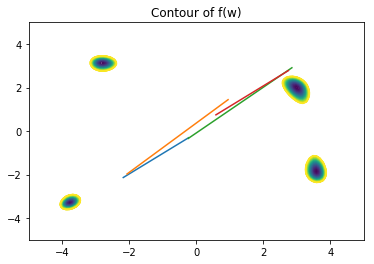

In [154]:
fig, ax = plt.subplots()
levels = np.linspace(-5.0, 5.0, 100)
x,y 
CS = ax.contour(X, Y, Z,levels = levels)
ax.plot(a[0],a[1])
ax.plot(b[0],b[1])
ax.plot(c[0],c[1])
ax.plot(d[0],d[1])
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour of f(w)')

In [155]:
print(b)

[[ 0.94763469 -2.07027624]
 [ 1.44435554 -1.97310189]
 [ 2.10659023 -1.88657544]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


Parameter Estimation

In [156]:
from scipy.stats import multivariate_normal

In [157]:
x = multivariate_normal.rvs([-1,0,4,1,0.5],2*np.identity(5))

NOTE: Purposely skipped 6th iteration as it took to long to run.  Therefore, only first 5 are shown below.

In [158]:
m = [-1,0,4,1,0.5]
a = [10,100,1000,10000,100000]
d = np.zeros(5)
for i in range(5):
    n = np.zeros(5)
    for j in range(10**(i+1)):
        x = multivariate_normal.rvs(m,2*np.identity(5))
        n = n + x
    k = n/(10**(i+1))
    print(k)
    d[i] = np.linalg.norm(k-m)**2
print(d)

[-1.41105222 -0.84305528  3.32619549  0.65671108  0.74481202]
[-1.02503767 -0.08223216  3.95063673  0.84849628  0.42691196]
[-1.01330190e+00  2.53388100e-03  3.97846416e+00  9.50889502e-01
  4.52627365e-01]
[-0.98538473  0.01182301  3.98397058  0.97822718  0.51547814]
[-0.99722175  0.0057098   4.00275606  0.98975027  0.50154899]
[1.51149887e+00 3.81209833e-02 5.30316124e-03 1.32396085e-03
 1.55372663e-04]


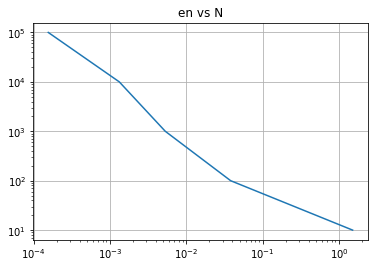

In [159]:
plt.loglog(d,a)
plt.grid(True)
plt.title('en vs N')
plt.show()